In [1]:
from google.colab import files
uploaded=files.upload()

Saving train.csv to train.csv


In [31]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score

In [6]:
df=pd.read_csv('train.csv',usecols=['Survived','Age','Fare'])

In [7]:
df.head(3)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [10]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [12]:
df['Age'] = df['Age'].fillna(df['Age'].mean())


In [13]:
df.head(2)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833


In [14]:
df.isnull().sum()

,0
Survived,0
Age,0
Fare,0


In [15]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=['Survived']),
    df['Survived'],
    test_size=0.2,
    random_state=42
)


<Axes: xlabel='Age', ylabel='Density'>

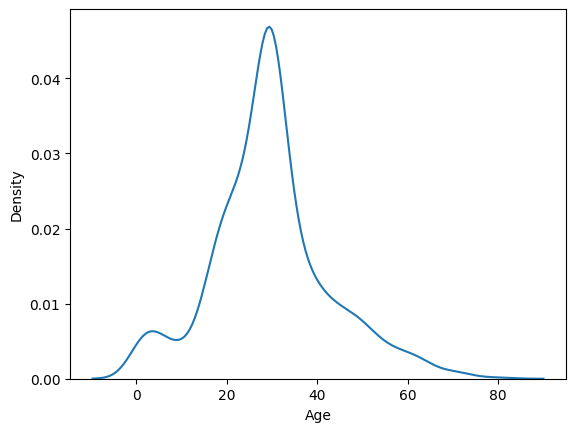

In [21]:
sns.kdeplot(df['Age'])


<Axes: xlabel='Fare', ylabel='Density'>

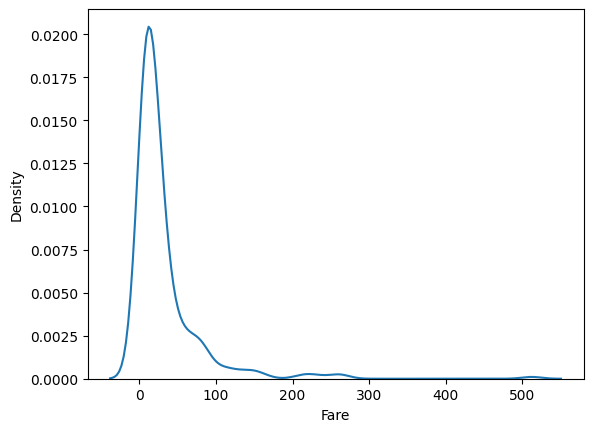

In [22]:
sns.kdeplot(df['Fare'])


In [23]:
from sklearn.preprocessing import PowerTransformer

In [24]:
pt_boxcox = PowerTransformer(method='box-cox')

X_train_bc = pt_boxcox.fit_transform(X_train)
X_test_bc = pt_boxcox.transform(X_test)

ValueError: The Box-Cox transformation can only be applied to strictly positive data

In [26]:
pt_yj = PowerTransformer(method='yeo-johnson')

X_train_yj = pt_yj.fit_transform(X_train)
X_test_yj = pt_yj.transform(X_test)

X_train_yj = pd.DataFrame(X_train_yj, columns=X_train.columns)


<Axes: xlabel='Age', ylabel='Density'>

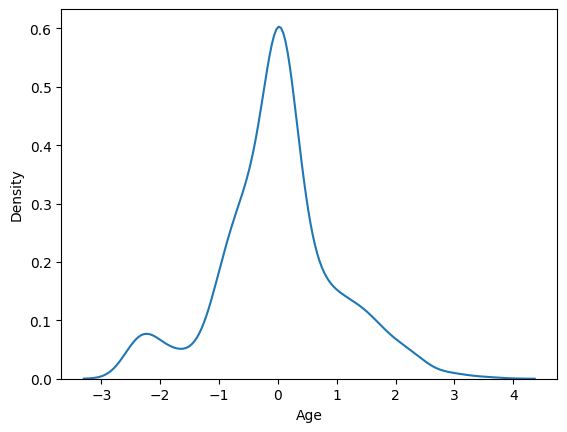

In [27]:
sns.kdeplot(X_train_yj['Age'])

<Axes: xlabel='Fare', ylabel='Density'>

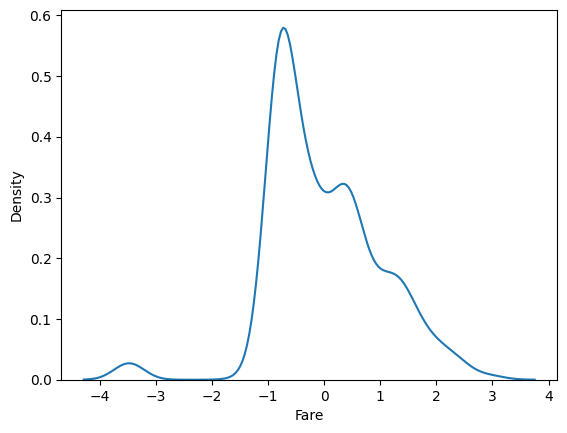

In [28]:
sns.kdeplot(X_train_yj['Fare'])

In [29]:
from sklearn.linear_model import LogisticRegression

In [32]:
clf = LogisticRegression()
print("Yeo-Johnson Accuracy:",
      np.mean(cross_val_score(clf, X_train_yj, y_train, cv=10)))


Yeo-Johnson Accuracy: 0.6586854460093896
